## ProjF3 - Baseline Model

Use this document as a template to provide the evaluation of your baseline model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import zipfile

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [2]:
# Path to the uploaded zip file
zip_file_path = '/content/dataset.zip'

# Directory where you want to extract the dataset
extracted_dir_path = '/content/'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# List the contents of the extracted directory
import os
print(os.listdir(extracted_dir_path))

['.config', 'dataset.zip', 'dataset', 'sample_data']


In [3]:
# Define image dimensions
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)
batch_size = 64

In [4]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=10,
    rotation_range=30,
    zoom_range=[0.8, 1.2],
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)


In [5]:
train_data_dir = 'dataset/train'

In [6]:
# Prepare train data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 4395 images belonging to 12 classes.


### 2. Prepare your Baseline Model

Here you can have your code to either train (e.g., if you are building it from scratch) or load (e.g., in the case that you are loading a pre-trained model) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

In [8]:
# Add custom layers on top of VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [9]:
# Define the model including both base and custom layers
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
# Unfreeze the last few layers of the VGG16 base model for fine-tuning
for layer in base_model.layers[:-2]:  # Freeze all layers except the last 2
    layer.trainable = False

# Ensure the last 2 layers are trainable
for layer in base_model.layers[-2:]:
    layer.trainable = True

In [11]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(train_generator, epochs=10)

Epoch 1/15
69/69 [==============================] - 92s 1s/step - loss: 1.7284 - accuracy: 0.4241
Epoch 2/15
69/69 [==============================] - 63s 914ms/step - loss: 1.0617 - accuracy: 0.6423
Epoch 3/15
69/69 [==============================] - 63s 910ms/step - loss: 0.8312 - accuracy: 0.7258
Epoch 4/15
69/69 [==============================] - 62s 902ms/step - loss: 0.6975 - accuracy: 0.7684
Epoch 5/15
69/69 [==============================] - 62s 903ms/step - loss: 0.5822 - accuracy: 0.8011
Epoch 6/15
69/69 [==============================] - 61s 886ms/step - loss: 0.4986 - accuracy: 0.8321
Epoch 7/15
69/69 [==============================] - 63s 917ms/step - loss: 0.4793 - accuracy: 0.8400
Epoch 8/15
69/69 [==============================] - 62s 899ms/step - loss: 0.3930 - accuracy: 0.8653
Epoch 9/15
69/69 [==============================] - 62s 890ms/step - loss: 0.3422 - accuracy: 0.8837
Epoch 10/15
69/69 [==============================] - 63s 919ms/step - loss: 0.3306 - accuracy:

### 3. Baseline Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

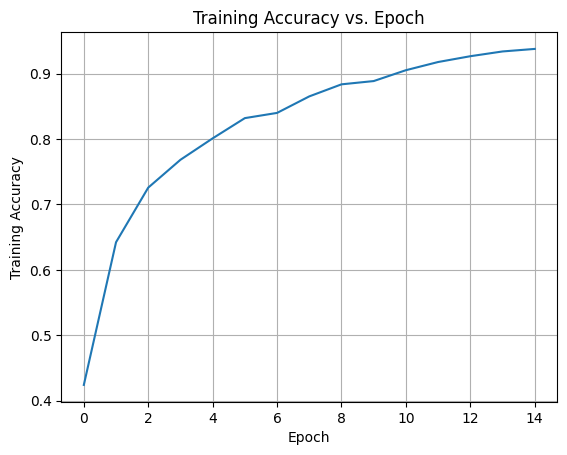

In [13]:
# Plot training accuracy vs. epoch
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.grid(True)
plt.show()


In [14]:
test_data_dir = 'dataset/test'

# Data preprocessing (similar to training)
test_datagen = ImageDataGenerator(rescale=1./255)

# Prepare test data generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 1099 images belonging to 12 classes.
18/18 [==============================] - 8s 421ms/step - loss: 0.7212 - accuracy: 0.8171
Test Loss: 0.7212291359901428
Test Accuracy: 0.8171064853668213


18/18 [==============================] - 5s 261ms/step


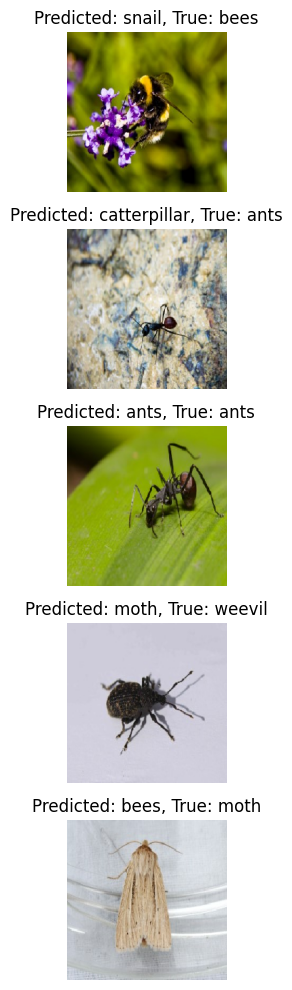

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Obtain predictions on the test set
test_predictions = model.predict(test_generator)

# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Plot some sample images along with their predicted and true labels
num_samples = 5  # Number of samples to visualize

plt.figure(figsize=(15, 10))
for i in range(num_samples):
    # Get a sample image and its corresponding true label
    img, true_label = test_generator.next()
    img = img[0]  # Take the first image from the batch
    true_label = np.argmax(true_label[0])  # Extract the true label index

    # Get the predicted label index
    pred_label = np.argmax(test_predictions[i])

    # Plot the image
    plt.subplot(num_samples, 1, i+1)
    plt.imshow(img)
    plt.axis('off')

    # Add title with predicted and true labels
    title = f"Predicted: {class_labels[pred_label]}, True: {class_labels[true_label]}"
    plt.title(title)

plt.tight_layout()
plt.show()
